In [1]:
import qiskit as qk

/Users/kevin.krsulichibm.com/q/qiskit-terra/qiskit/__init__.py:78: DeprecationWarning: Using Qiskit with Python 3.5 is deprecated as of the 0.12.0 release. Support for running Qiskit with Python 3.5 will be removed at the Python 3.5 EoL on 09/13/2020.
  "Python 3.5 EoL on 09/13/2020.", DeprecationWarning)


In [2]:
from qiskit.circuit import ReglessQubit, ReglessClbit

In [3]:
qargs = [ReglessQubit() for _ in range(5)]
cargs = [ReglessClbit() for _ in range(1)]

In [4]:
qargs

[ReglessQubit(0x12458d4e0),
 ReglessQubit(0x12458d438),
 ReglessQubit(0x12458dc18),
 ReglessQubit(0x12458d748),
 ReglessQubit(0x12458d630)]

In [5]:
cargs

[ReglessClbit(0x12458d7b8)]

In [6]:
from qiskit.circuit import QuantumRegister, ClassicalRegister

In [7]:
qr = QuantumRegister(bits=qargs)
cr = ClassicalRegister(bits=cargs)

In [8]:
qr

QuantumRegister(5, 'q0')

In [9]:
cr

ClassicalRegister(1, 'c0')

In [10]:
qr[0]

ReglessQubit(0x12458d4e0)

In [11]:
cr[0]

ReglessClbit(0x12458d7b8)

In [12]:
qc = qk.QuantumCircuit(qr, cr)

In [13]:
qc.qubits

[ReglessQubit(0x12458d4e0),
 ReglessQubit(0x12458d438),
 ReglessQubit(0x12458dc18),
 ReglessQubit(0x12458d748),
 ReglessQubit(0x12458d630)]

In [14]:
qc.clbits

[ReglessClbit(0x12458d7b8)]

In [15]:
qc.qregs

{QuantumRegister(5, 'q0')}

In [16]:
qc.cregs

{ClassicalRegister(1, 'c0')}

In [17]:
qc.h(qr[0])

In [18]:
qc.h(0)

In [19]:
qc = qk.QuantumCircuit(5,3)

In [20]:
qc.qubits

[ReglessQubit(0x1245a0198),
 ReglessQubit(0x1245a05c0),
 ReglessQubit(0x1245a0d30),
 ReglessQubit(0x1245a0e48),
 ReglessQubit(0x1245a00b8)]

In [21]:
qc.clbits

[ReglessClbit(0x1245a0588),
 ReglessClbit(0x1245a0c18),
 ReglessClbit(0x1245a0cf8)]

In [22]:
qc.qregs

set()

In [23]:
qc.cregs

set()

In [24]:
qc.h(0)

In [25]:
print(qc)

                               ┌───┐
ReglessQubit(0x1245a0198)_: |0>┤ H ├
                               └───┘
ReglessQubit(0x1245a05c0)_: |0>─────
                                    
ReglessQubit(0x1245a0d30)_: |0>─────
                                    
ReglessQubit(0x1245a0e48)_: |0>─────
                                    
ReglessQubit(0x1245a00b8)_: |0>─────
                                    
 ReglessClbit(0x1245a0588)_: 0 ═════
                                    
 ReglessClbit(0x1245a0c18)_: 0 ═════
                                    
 ReglessClbit(0x1245a0cf8)_: 0 ═════
                                    


In [26]:
dag = qk.converters.circuit_to_dag(qc)

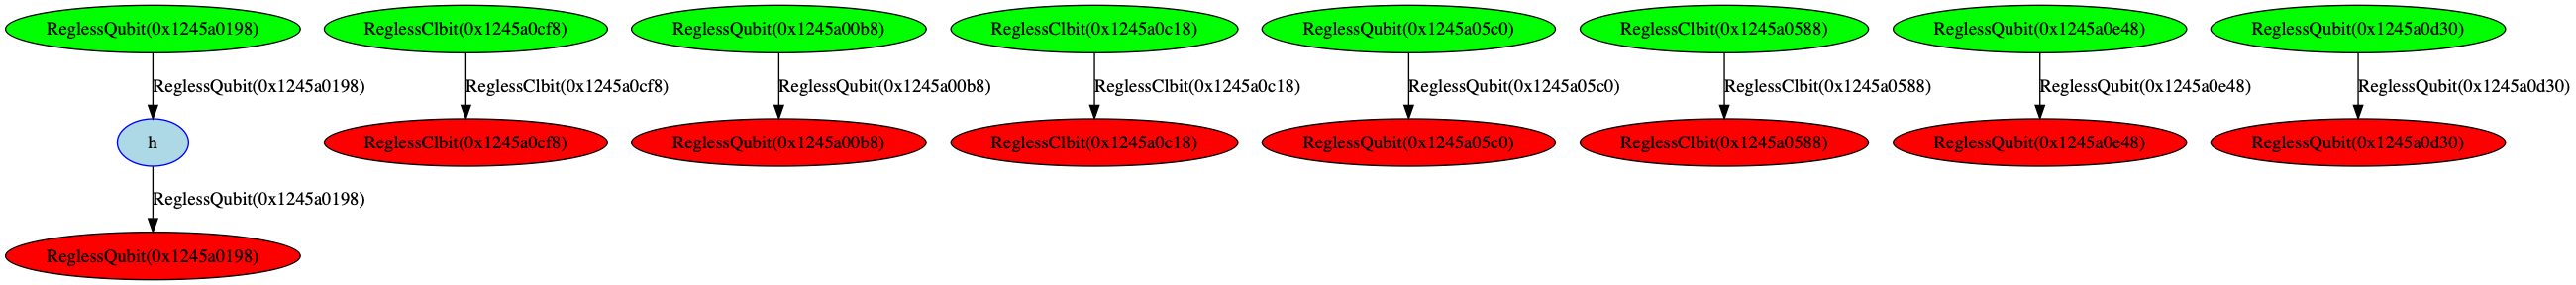

In [27]:
dag.draw()

In [28]:
list(dag.layers())

[{'graph': <qiskit.dagcircuit.dagcircuit.DAGCircuit at 0x1246f5550>,
  'partition': [[ReglessQubit(0x1245a0198)]]}]

In [29]:
qc.mark_bits((0,2,4), 'foo')

QuantumRegister(3, 'foo')

In [30]:
qc.qregs

{QuantumRegister(3, 'foo')}

In [31]:
list(qc.qregs)[0][:]

[ReglessQubit(0x1245a0198),
 ReglessQubit(0x1245a0d30),
 ReglessQubit(0x1245a00b8)]

In [32]:
h_broad = qk.QuantumCircuit(5)
h_broad.h(h_broad.qubits)
print(h_broad)

                               ┌───┐
ReglessQubit(0x1246fdc18)_: |0>┤ H ├
                               ├───┤
ReglessQubit(0x1246fdc50)_: |0>┤ H ├
                               ├───┤
ReglessQubit(0x1246fdc88)_: |0>┤ H ├
                               ├───┤
ReglessQubit(0x1246fdcc0)_: |0>┤ H ├
                               ├───┤
ReglessQubit(0x1246fdcf8)_: |0>┤ H ├
                               └───┘


In [33]:
cx_tile = qk.QuantumCircuit(5)
for i in range(4):
    cx_tile.cx(i, i+1)
print(cx_tile)

                                                   
ReglessQubit(0x124702128)_: |0>──■─────────────────
                               ┌─┴─┐               
ReglessQubit(0x124702160)_: |0>┤ X ├──■────────────
                               └───┘┌─┴─┐          
ReglessQubit(0x1247022e8)_: |0>─────┤ X ├──■───────
                                    └───┘┌─┴─┐     
ReglessQubit(0x1247020b8)_: |0>──────────┤ X ├──■──
                                         └───┘┌─┴─┐
ReglessQubit(0x124702208)_: |0>───────────────┤ X ├
                                              └───┘


In [34]:
th = qk.circuit.Parameter('theta')
qc = qk.QuantumCircuit(5,1)
qc.append(h_broad, range(5))

In [35]:
print(qc)

                               ┌───────────┐
ReglessQubit(0x1247029e8)_: |0>┤0          ├
                               │           │
ReglessQubit(0x124702c50)_: |0>┤1          ├
                               │           │
ReglessQubit(0x124702ac8)_: |0>┤2 Circuit2 ├
                               │           │
ReglessQubit(0x124702a90)_: |0>┤3          ├
                               │           │
ReglessQubit(0x125b19320)_: |0>┤4          ├
                               └───────────┘
 ReglessClbit(0x125b19160)_: 0 ═════════════
                                            


In [36]:
h_broad.data[0][1][0]

ReglessQubit(0x1246fdc18)